# Experiment 7 - Analysis

In [72]:
from glob import glob
from population.population import Population
import pandas as pd
import os
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Hyperparameters
use_backup = False
populations = ['default', 'connection', 'gru_nr', 'gru_nr_connection']
max_v = 10

In [42]:
# Parameters
FOLDER = f"population{'_backup' if use_backup else ''}/storage/experiment7/"

## Load in the data

### Number of generations until solution

In [27]:
df_gens = pd.DataFrame()
for p in populations:
    gens = []
    for v in range(1, max_v+1):
        gens.append(len(glob(f'{FOLDER}{p}/v{v}/generations/gen_*')))
    df_gens[p] = gens

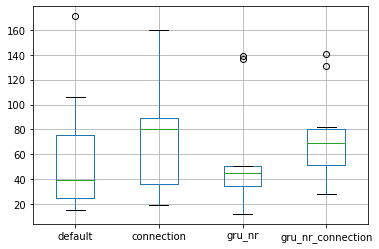

In [28]:
df_gens.boxplot()

### Found solution

In [45]:
%%capture
df_solutions = pd.DataFrame()
for p in populations:
    solutions = []
    for v in range(1, max_v+1):
        pop = Population(
                name=f'{p}/v{v}',
                folder_name='experiment7',
                use_backup=False,
        )
        solutions.append(deepcopy(pop.best_genome))
    df_solutions[p] = solutions


Population 'default/v1' loaded successfully! Current generation: 22

Population 'default/v2' loaded successfully! Current generation: 170

Population 'default/v3' loaded successfully! Current generation: 76

Population 'default/v4' loaded successfully! Current generation: 39

Population 'default/v5' loaded successfully! Current generation: 21

Population 'default/v6' loaded successfully! Current generation: 70

Population 'default/v7' loaded successfully! Current generation: 38

Population 'default/v8' loaded successfully! Current generation: 14

Population 'default/v9' loaded successfully! Current generation: 105

Population 'default/v10' loaded successfully! Current generation: 30

Population 'connection/v1' loaded successfully! Current generation: 126

Population 'connection/v2' loaded successfully! Current generation: 30

Population 'connection/v3' loaded successfully! Current generation: 159

Population 'connection/v4' loaded successfully! Current generation: 76

Population 'conn

In [52]:
def get_genome_params(g, pop_name):
    # Recurrent unit
    result = [b for b in g.nodes[2].bias_h]
    result += [w[0] for w in g.nodes[2].weight_xh]
    result += [w[0] for w in g.nodes[2].weight_hh]
    
    # Other parameters
    result += [g.connections[(-1, 1)].weight]
    if 'connection' not in pop_name: result += [g.connections[(-1, 2)].weight, g.connections[(2, 1)].weight]
    result += [g.nodes[1].bias]
    return result

In [59]:
def get_head(pop_name):
    head = []
    if 'gru_nr' in pop_name:
        head += ['bias_z', 'bias_h']
        head += ['weight_xz', 'weight_xh']
        head += ['weight_hz', 'weight_hh']
    else:
        head += ['bias_r', 'bias_z', 'bias_h']
        head += ['weight_xr', 'weight_xz', 'weight_xh']
        head += ['weight_hr', 'weight_hz', 'weight_hh']
        
    head += ['c0']
    if 'connection' not in pop_name: head += ['c1', 'c2']
    head += ['bias_rw']
    return head

In [60]:
data = []
for solution in df_solutions['default'].values:
    data.append(get_genome_params(solution, 'default'))
df_default = pd.DataFrame(data, columns=get_head('default'))

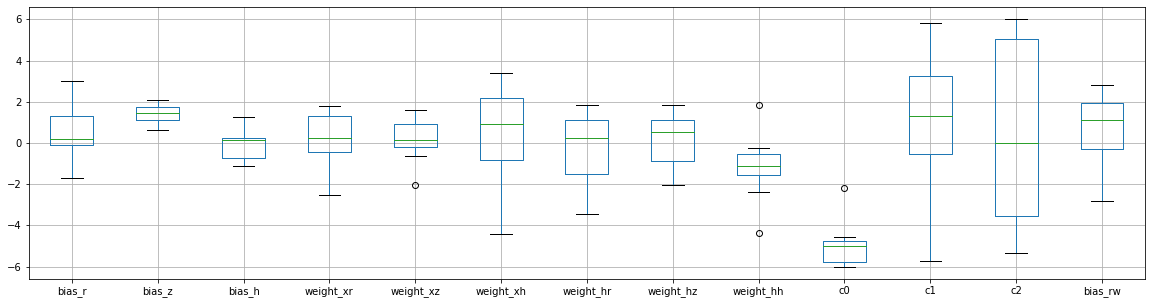

In [68]:
plt.figure(figsize=(20, 5))
df_default.boxplot()
plt.show()
plt.close()

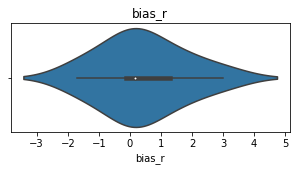

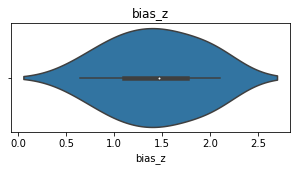

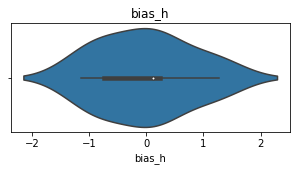

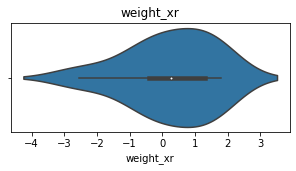

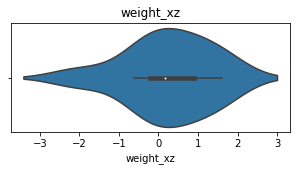

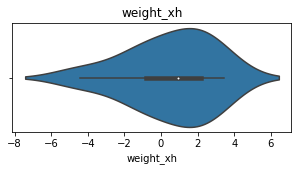

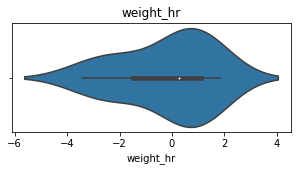

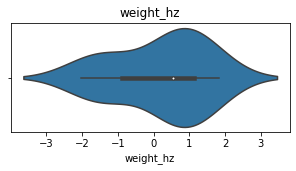

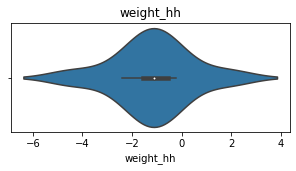

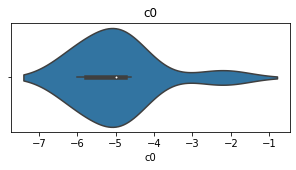

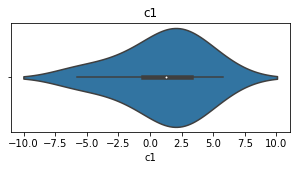

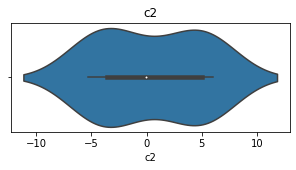

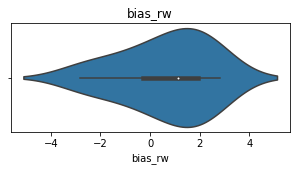

In [73]:
for col in df_default.columns:
    plt.figure(figsize=(5,2))
    sns.violinplot(df_default[col])
    plt.title(col)
    plt.show()
    plt.close()